# Titanic Data Analysis

The column heading variables have the following meanings:

survival: Survival (0 = no; 1 = yes)

class: Passenger class (1 = first; 2 = second; 3 = third)

name: Name

sex: Sex

age: Age

sibsp: Number of siblings/spouses aboard

parch: Number of parents/children aboard

ticket: Ticket number

fare: Passenger fare

cabin: Cabin

embarked: Port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

boat: Lifeboat (if survived)

body: Body number (if did not survive and body was recovered



In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd
import numpy as np
from scipy.stats import norm

In [54]:
df = pd.read_csv("titanic.csv")

In [55]:
df.shape

(891, 12)

In [56]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [57]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [58]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [59]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [60]:
#df.fillna('0') This will fill all null values as zero

In [61]:
len(df)

891

In [62]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [63]:
data = df[pd.notnull(df['Age'])]

In [64]:
data.shape

(714, 12)

In [65]:
data1 = data[pd.notnull(data['Embarked'])]

In [66]:
data1.shape

(712, 12)

In [67]:
pd.crosstab(data1.Survived,data1.Sex,margins=True)

Sex,female,male,All
Survived,,,
0,64,360,424
1,195,93,288
All,259,453,712


In [68]:
pd.crosstab([data1.Embarked,data1.Survived],data1.Sex,margins=True)

Sex                female  male  All
Embarked Survived                   
C        0              6    45   51
         1             55    24   79
Q        0              5    15   20
         1              7     1    8
S        0             53   300  353
         1            133    68  201
All                   259   453  712

In [69]:
data1.groupby('Sex').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,440.154440,0.752896,2.073359,27.745174,0.644788,0.714286,47.332433
male,453.412804,0.205298,2.335541,30.726645,0.439294,0.271523,27.268836


In [70]:
#data4=pd.DataFrame(data2[data2['Survived']==1].groupby(by='Sex').count())
data4 = data1[data1['Survived']==1]

In [71]:
data4

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,NaN,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.00,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.00,0,0,113783,26.5500,C103,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.00,0,0,248706,16.0000,NaN,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.00,0,0,248698,13.0000,D56,S
22,23,1,3,"McGowan, Miss. Anna ""Annie""",female,15.00,0,0,330923,8.0292,NaN,Q


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Passengers and Sailor Travel Age')

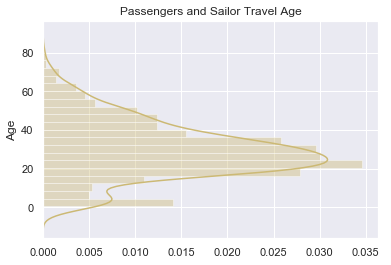

In [72]:
#sns.set()
#plt.hist(data4['Age'],bins=10,color='black',histtype='bar',cumulative=False)
#plt.xlabel('Age')
#plt.ylabel('Survived Count')
#plt.title('Age Wise Survived Count')
sns.distplot(data1['Age'],bins=20,color = 'y',vertical = True)#,rug=True,hist=False,fit=norm,kde=False)
plt.title('Passengers and Sailor Travel Age')

Text(0.5,1,'Fare price purchased by Sex')

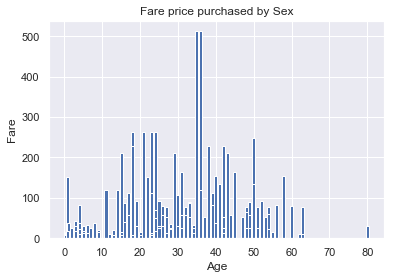

In [73]:
sns.set()
plt.bar(data4['Age'],data4['Fare'],)
plt.xlabel('Age')
plt.ylabel('Fare')
#sns.boxplot(x=data1['Sex'],y=data1['Fare'],hue=data1['Survived'],data=data1,palette=["m", "g"],color=".25")
plt.title('Fare price purchased by Sex')

Text(0.5,1,'Survived Status')

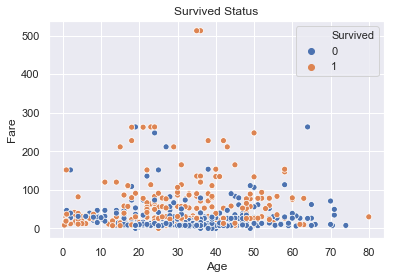

In [74]:
sns.scatterplot(x=data1['Age'],y=data1['Fare'],hue=data1["Survived"])
plt.title('Survived Status')

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Survied Age by Gender')

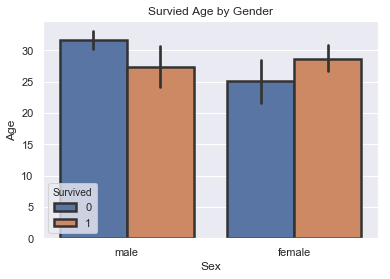

In [75]:
sns.barplot(x=data1['Sex'],y=data1['Age'],hue=data1["Survived"],linewidth=2.5,errcolor=".2",edgecolor=".2")
plt.title('Survied Age by Gender')

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Survived Gender by Fare')

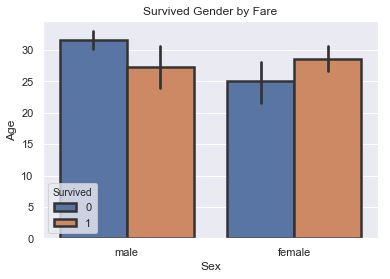

In [76]:
sns.barplot(x=data1['Sex'],y=data1['Age'],hue=data1["Survived"],linewidth=2.5,errcolor=".2",edgecolor=".2")
plt.title('Survived Gender by Fare')

Text(0.5,1,'Fare price purchased by Sex')

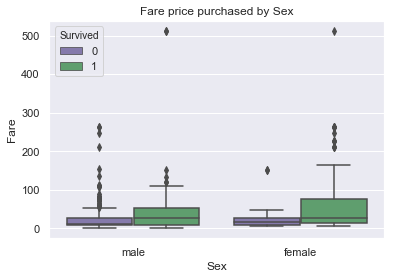

In [77]:
sns.boxplot(x=data1['Sex'],y=data1['Fare'],hue=data1['Survived'],data=data1,palette=["m", "g"],color=".25")
#sns.swarmplot(x=data1['Age'],y=data1['Fare'],hue=data1['Survived'],data=data1,palette=["m", "g"],color=".25")
plt.title('Fare price purchased by Sex')

Text(0.5,1,'Fare price purchased by Sex')

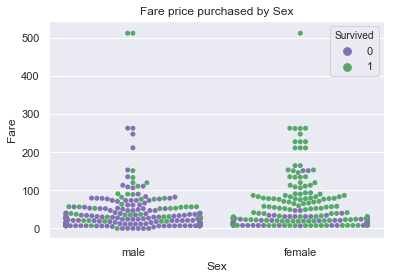

In [78]:
sns.swarmplot(x=data1['Sex'],y=data1['Fare'],hue=data1['Survived'],data=data1,palette=["m", "g"],color=".25")
plt.title('Fare price purchased by Sex')